## Ensemble Learning (Any one) 
### A. Implement Random Forest Classifier model to predict the safety of the car. 
Dataset link: https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set 

Ensemble Learning combines multiple models to improve predictive performance. Random Forest is an ensemble method that uses multiple decision trees, each trained on random subsets of data and features.

In Random Forest Classification:

1. Data Sampling: Each tree is trained on a random sample of the data (with replacement, called "bagging").
2. Feature Selection: Trees are built with a random subset of features at each split, reducing correlation between trees.
3. Prediction: For classification, each tree "votes" on the class, and the most common class is chosen.

In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [71]:
car_data = pd.read_csv("car.csv", header=None)


In [72]:
car_data.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [73]:
car_data.shape

(1728, 7)

In [74]:
car_data.columns

Index([0, 1, 2, 3, 4, 5, 6], dtype='int64')

In [75]:
car_data.describe()

,0,1,2,3,4,5,6
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [76]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1728 non-null   object
 1   1       1728 non-null   object
 2   2       1728 non-null   object
 3   3       1728 non-null   object
 4   4       1728 non-null   object
 5   5       1728 non-null   object
 6   6       1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [77]:
car_data.columns = ['Buying', 'Maint', 'Doors', 'Persons', 'Lug_boot', 'Safety', 'Class']
print(car_data.head())

  Buying  Maint Doors Persons Lug_boot Safety  Class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc


In [78]:
car_data.Class.value_counts()

Class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [79]:
le=LabelEncoder()

In [80]:
for col in car_data.columns:
    car_data[col]=le.fit_transform(car_data[col])

In [81]:
# print("\nColumns after one-hot encoding:")
# print(car_data_encoded.columns)
car_data.sample(10)

,Buying,Maint,Doors,Persons,Lug_boot,Safety,Class
292,3,2,2,2,1,2,0
828,0,1,2,2,2,1,2
72,3,3,2,2,2,1,2
1621,1,1,0,0,2,2,2
754,0,2,3,2,0,2,0
643,0,0,3,2,1,2,0
1379,1,3,3,0,2,0,2
1069,2,0,3,1,0,2,0
1559,1,2,1,2,2,0,1
521,0,3,3,0,0,0,2


In [83]:
X = car_data.drop('Class', axis=1)
y = car_data['Class']

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4,stratify=y)


In [85]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=2)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=2)

In [86]:
y_pred = rf_model.predict(X_test)

In [87]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Random Forest Classifier: {accuracy * 100:.2f}%")

Accuracy of Random Forest Classifier: 98.27%


In [88]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.94      0.96        77
           1       1.00      0.93      0.96        14
           2       0.98      1.00      0.99       242
           3       0.93      1.00      0.96        13

    accuracy                           0.98       346
   macro avg       0.97      0.97      0.97       346
weighted avg       0.98      0.98      0.98       346



In [89]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[ 72,   0,   4,   1],
       [  1,  13,   0,   0],
       [  0,   0, 242,   0],
       [  0,   0,   0,  13]], dtype=int64)

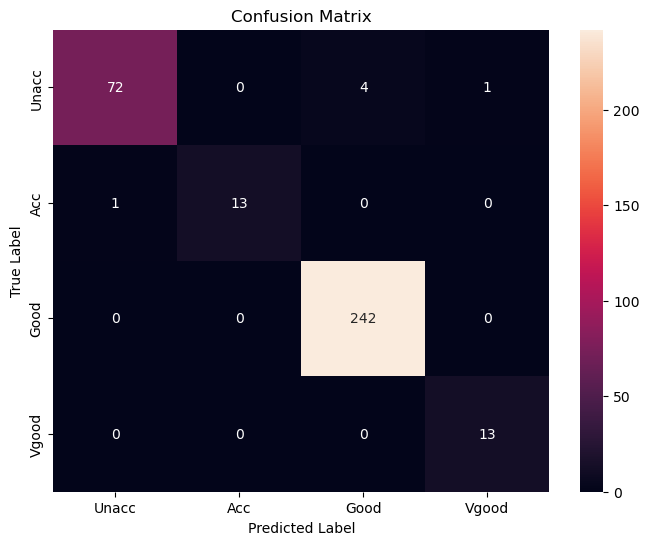

In [90]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=['Unacc', 'Acc', 'Good', 'Vgood'],yticklabels=['Unacc', 'Acc', 'Good', 'Vgood'])
plt.title("Confusion Matrix")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()